In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error
)
import warnings
warnings.filterwarnings('ignore')

* Regressão linear com numpy:

In [2]:
# Vamos gerar alguns dados lineares para testar a equação normal:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Agora calculamos θ usando a equação normal. Usaremos a função inv() para contabilizar o inverso de uma matriz e o método dot() 
# para multiplicação de matrizes:

X_b = np.c_[np.ones((100, 1)), X] # adiciona x0 = 1 em cada instância
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[3.96183943],
       [3.16880619]])

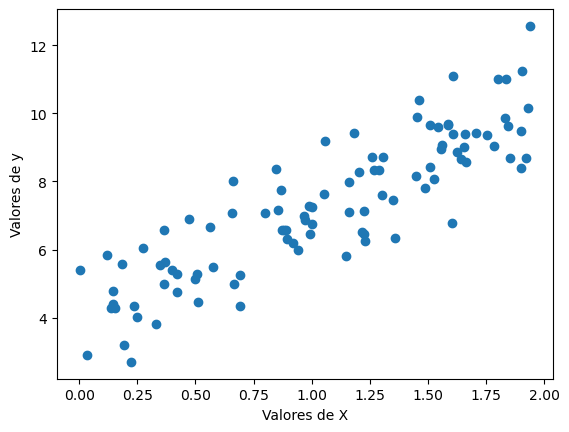

In [3]:
plt.scatter(X, y)
plt.xlabel('Valores de X')
plt.ylabel('Valores de y')
plt.show()

In [4]:
# Agora, realizaremos as predições usando θ:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

y_predict

array([[ 3.96183943],
       [10.29945181]])

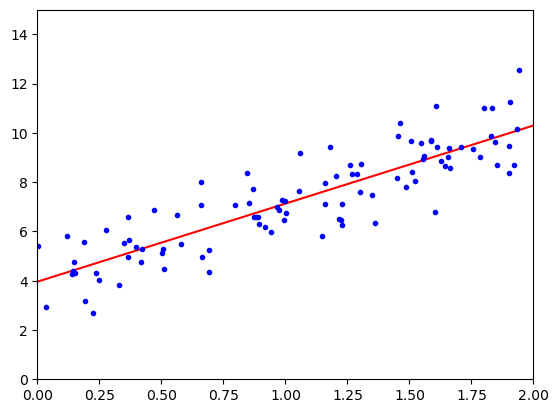

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y , "b.")
plt.axis([0, 2, 0, 15])
plt.show()

* Modelo de regressão linear com Scikit-learn:

Equação do modelo: 26.07 + 2.66 * Área
Erro Quadrático Médio (MSE): 35.53
MAPE: 2.07%


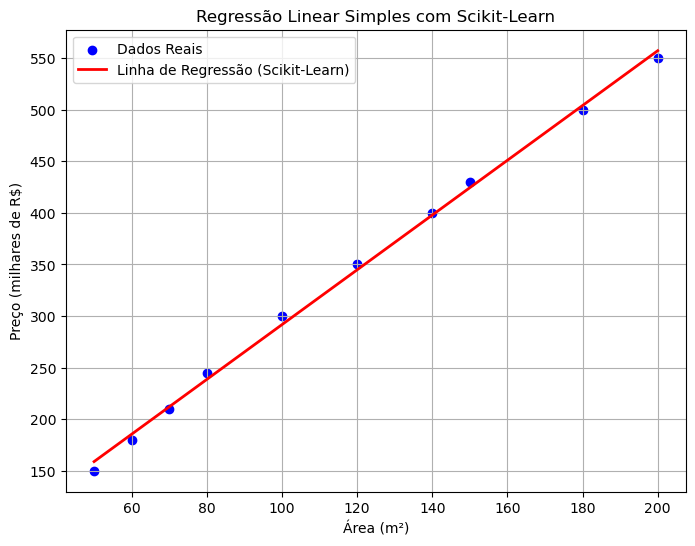

In [6]:
# 1. Dados:
X_simples = np.array([50, 60, 70, 80, 100, 120, 140, 150, 180, 200]).reshape(-1,1)
y_simples = np.array([150, 180, 210, 245, 300, 350, 400, 430, 500, 550])

# 2. Inicializar e treinar o modelo:
modelo_simples = LinearRegression()
modelo_simples.fit(X_simples, y_simples)

# 3. Extrair os parâmetros aprendidos:
theta_0 = modelo_simples.intercept_  # Intercepto (bias)
theta_1 = modelo_simples.coef_[0] # Coeficiente (peso)

print(f"Equação do modelo: {theta_0:.2f} + {theta_1:.2f} * Área")

# 4. Fazer predições:
y_predicto = modelo_simples.predict(X_simples)

# 5. Avaliar o modelo:
mse = mean_squared_error(y_simples, y_predicto)
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
mape = mean_absolute_percentage_error(y_simples, y_predicto) * 100
print(f"MAPE: {mape:.2f}%")

# 6. Visualizar os resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_simples, y_simples, color='blue', label='Dados Reais')
plt.plot(X_simples, y_predicto, color='red', linewidth=2, label='Linha de Regressão (Scikit-Learn)')
plt.title('Regressão Linear Simples com Scikit-Learn')
plt.xlabel('Área (m²)')
plt.ylabel('Preço (milhares de R$)')
plt.legend()
plt.grid(True)
plt.show()